# Pre-processing Data for Clustering

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer

In [6]:
def load_data():
    imp = Imputer(missing_values=np.nan, strategy='most_frequent')
    train_df = pd.read_csv('yelp_dataset/businesses_train.csv')
    test_df = pd.read_csv('yelp_dataset/businesses_test.csv')
    data = train_df.append(test_df)
    data = data.drop(['business_id','categories','rating'], axis = 1)
    return pd.DataFrame(imp.fit_transform(data), columns=data.columns.values)

In [7]:
data = load_data()
data.head(5)

,$,$$,$$$,$$$$,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,...,paid,quiet,romantic,street,touristy,trendy,upscale,valet,validated,very_loud
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Categorizing Data for Clustering

In [8]:
def categorize_data(df):
    price_df = df['$']*1 + df['$$']*2 + df['$$$']*4 + df['$$$$']*8
    ambience_df = df['romantic']*1 + df['classy']*2 + df['hipster']*4 + df['intimate']*8 + df['divey']*16 + df['touristy']*32 + df['trendy']*64 + df['upscale']*128 + df['casual']*256
    GoodForMeal_df = df['dessert']*1 + df['latenight']*2 + df['lunch']*4 + df['dinner']*8 + df['breakfast']*16 + df['brunch']*32
    noise_df = df['average']*1 + df['loud']*2 + df['quiet']*4 + df['very_loud']*8
    alcohol_df = df['beer_and_wine']*1 + df['full_bar']*2 + df['none']*4
    attire_df = df['casual_attire']*1 + df['dressy']*2 + df['formal']*4
    wifi_df = df['no']*1 + df['free']*2 + df['paid']*4
    BusinessParking_df = df['garage']*1 + df['street']*2 + df['lot']*4 + df['valet']*8 + df['validated']*16
    df['Price'] = price_df
    df['Ambience'] = ambience_df
    df['GoodForMeal'] = GoodForMeal_df
    df['Noise'] = noise_df
    df['Alcohol'] = alcohol_df
    df['RestaurantsAttire'] = attire_df
    df['WiFi'] = wifi_df
    df['BusinessParking'] = BusinessParking_df
    df = df.drop(['$','$$','$$$','$$$$'], axis=1)
    df = df.drop(['romantic','classy','hipster','intimate','divey','touristy','trendy','upscale','casual'], axis=1)
    df = df.drop(['dessert','latenight','lunch','dinner','breakfast','brunch'], axis=1)
    df = df.drop(['average','loud','quiet','very_loud'], axis=1)
    df = df.drop(['beer_and_wine','full_bar','none'], axis=1)
    df = df.drop(['casual_attire','dressy','formal'], axis=1)
    df = df.drop(['no','free','paid'], axis=1)
    df = df.drop(['garage','street','lot','valet','validated'], axis=1)
    
    #Bin Elevations
    bins = [-50, 250, 500, 750, 1000, 1250, 3000]
    labels = [1,2,3,4,5,6]
    df['Elevation'] = pd.cut(df['elevation'], bins=bins, labels=labels)
    df = df.drop(['elevation'], axis=1)
    
    df = df.astype(int)
    return df

In [24]:
categorized = categorize_data(data)
categorized.head(10)

,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTableService,...,WheelchairAccessible,Price,Ambience,GoodForMeal,Noise,Alcohol,RestaurantsAttire,WiFi,BusinessParking,Elevation
0,0,1,0,1,1,0,0,1,1,0,...,0,2,0,0,1,0,1,0,2,5
1,0,1,1,1,0,1,0,1,0,0,...,1,2,0,0,0,4,1,1,6,4
2,1,0,0,1,1,0,0,1,1,1,...,0,2,0,0,1,1,1,2,0,1
3,1,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,2,4,2
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,1,1,0,1,0,0,0,1,0,0,...,1,1,256,2,1,4,1,1,4,2
6,1,1,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2
7,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,2,0,1,0,0,1
8,1,1,0,1,1,1,0,1,0,0,...,1,1,256,12,1,2,1,1,4,2
9,1,1,0,1,0,0,1,1,1,1,...,1,2,0,4,4,2,1,1,0,1


# Applying PCA for Reducing Dimentionality to 2D

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = categorized.values.astype(float)
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head(10)

,principal component 1,principal component 2
0,0.888646,-1.552875
1,2.352798,1.836317
2,1.753737,-2.643690
3,-0.217192,2.824621
4,-2.772562,-1.871772
5,2.299831,1.543190
6,-2.481279,0.309503
7,-0.052015,-3.110267
8,3.178794,1.772808
9,2.847653,-1.789223


# K-Means Clustering in 2D

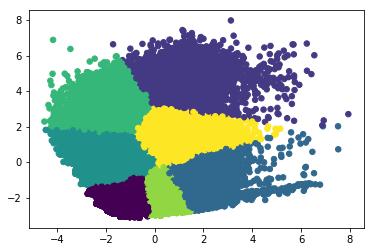

In [50]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(principalComponents)
clusters = kmeans.fit_predict(principalComponents)
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c = clusters, s=30)
plt.show()

# Applying PCA for Reducing Dimentionality to 3D

In [53]:
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(x)
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf3.head(10)

,principal component 1,principal component 2,principal component 3
0,0.888641,-1.552005,1.652889
1,2.352742,1.843342,-1.140071
2,1.753739,-2.644683,1.863076
3,-0.217228,2.826497,-1.310745
4,-2.772555,-1.872460,-0.453687
5,2.299827,1.544012,-1.682144
6,-2.481265,0.309595,-0.253057
7,-0.052038,-3.108701,-1.422318
8,3.178826,1.769226,-0.758268
9,2.847640,-1.786274,1.496595


# K-Means Clustering in 3D

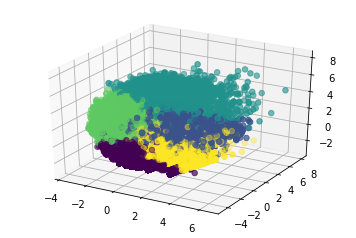

In [61]:
from mpl_toolkits.mplot3d import Axes3D
kmeans3 = KMeans(n_clusters=5, random_state=0).fit(principalComponents3)
clusters3 = kmeans3.fit_predict(principalComponents3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=principalComponents3[:,2], ys=principalComponents3[:,1], zs=principalComponents3[:,0],c=clusters3, s=30)
plt.show()

# K-Modes Clustering for Categorical Data

https://github.com/nicodv/kmodes

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [37]:
from kmodes.kmodes import KModes
# Need to play with cluster size and number of iterations 
km = KModes(n_clusters=7, init='Huang', n_init=1, verbose=2)

In [38]:
clusters = km.fit_predict(categorized.values)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 46321, cost: 476984.0
Run 1, iteration: 2/100, moves: 17467, cost: 468551.0
Run 1, iteration: 3/100, moves: 6154, cost: 468551.0


In [39]:
categorized['Clusters'] = clusters

In [40]:
categorized.head(20)

,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTableService,...,Price,Ambience,GoodForMeal,Noise,Alcohol,RestaurantsAttire,WiFi,BusinessParking,Elevation,Clusters
0,0,1,0,1,1,0,0,1,1,0,...,2,0,0,1,0,1,0,2,5,0
1,0,1,1,1,0,1,0,1,0,0,...,2,0,0,0,4,1,1,6,4,4
2,1,0,0,1,1,0,0,1,1,1,...,2,0,0,1,1,1,2,0,1,0
3,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,2,4,2,5
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
5,1,1,0,1,0,0,0,1,0,0,...,1,256,2,1,4,1,1,4,2,4
6,1,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,2,2
7,0,0,0,1,0,0,0,1,0,0,...,0,0,0,2,0,1,0,0,1,1
8,1,1,0,1,1,1,0,1,0,0,...,1,256,12,1,2,1,1,4,2,3
9,1,1,0,1,0,0,1,1,1,1,...,2,0,4,4,2,1,1,0,1,0


# Scatter plot in 2D

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 47734, cost: 486644.0
Run 1, iteration: 2/100, moves: 15239, cost: 469980.0
Run 1, iteration: 3/100, moves: 10050, cost: 467311.0
Run 1, iteration: 4/100, moves: 2063, cost: 467311.0


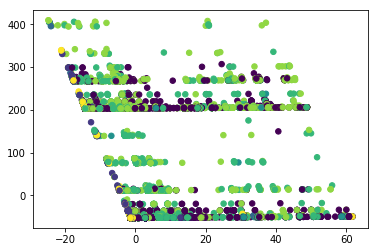

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
#x = categorized.values.astype(float)
#x = StandardScaler().fit_transform(x)
#plot_columns = pca.fit_transform(x)
km = KModes(n_clusters=7, init='Huang', n_init=1, verbose=2)
clusters = km.fit_predict(categorized)
plot_columns = pca.fit_transform(categorized.iloc[:,0:21])
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

# Scatter Plot to Depict Clusters

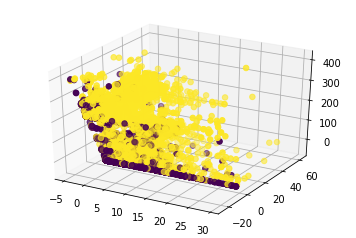

In [34]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(3)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(categorized.iloc[:,0:21])

# Need to use 3D plot and 3 prinicipal components
# Plot based on the two dimensions, and shade by cluster label
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=plot_columns[:,2], ys=plot_columns[:,1], zs=plot_columns[:,0],c=categorized["Clusters"], s=30)
plt.show()

# Agglomerative Clustering based on Business Category

In [3]:
import spacy
import pandas as pd

In [2]:
nlp = spacy.load('en_core_web_md')

In [66]:
df = pd.read_csv('Data\cat100.csv')

In [67]:
def getPhraseVector(phrase): return nlp(phrase).vector

In [68]:
df['vector'] = df['category'].apply(getPhraseVector)

In [94]:
df.head(10)

,category,vector
0,Restaurants,"[0.75425, 0.082286, 0.26682, -1.1926, 1.3475, ..."
1,Food,"[-0.43512, 0.028351, 0.4911, -0.35168, -0.1157..."
2,Nightlife,"[0.75425, 0.082286, 0.26682, -1.1926, 1.3475, ..."
3,Bars,"[1.1394, 0.076544, 0.286, -0.19903, 0.79315, -..."
4,Coffee & Tea,"[-0.103291, 0.0027956665, -0.01886467, -0.2395..."
5,Sandwiches,"[0.025339, -0.59327, 0.60124, 0.1331, 0.064419..."
6,Fast Food,"[-0.444305, 0.12815051, 0.03895001, -0.326115,..."
7,American (Traditional),"[-0.3096925, 0.04973865, -0.015530257, 0.08481..."
8,Pizza,"[0.0068727, -0.21634, 0.27831, -0.26192, 0.228..."
9,Burgers,"[-0.31675, -0.14571, 0.9289, 0.019212, 0.38359..."


In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

In [71]:
X = df['vector']
X = np.asarray([x for x in X])

In [72]:
zero_valued_rows = np.where(~X.any(axis=1))[0]
X = np.delete(X,zero_valued_rows,axis = 0)
df = df.drop(zero_valued_rows, axis = 0)

In [74]:
X.shape

(181, 300)

In [75]:
linked = linkage(X, 'single', 'cosine')

In [79]:
labelList = df['category'].values

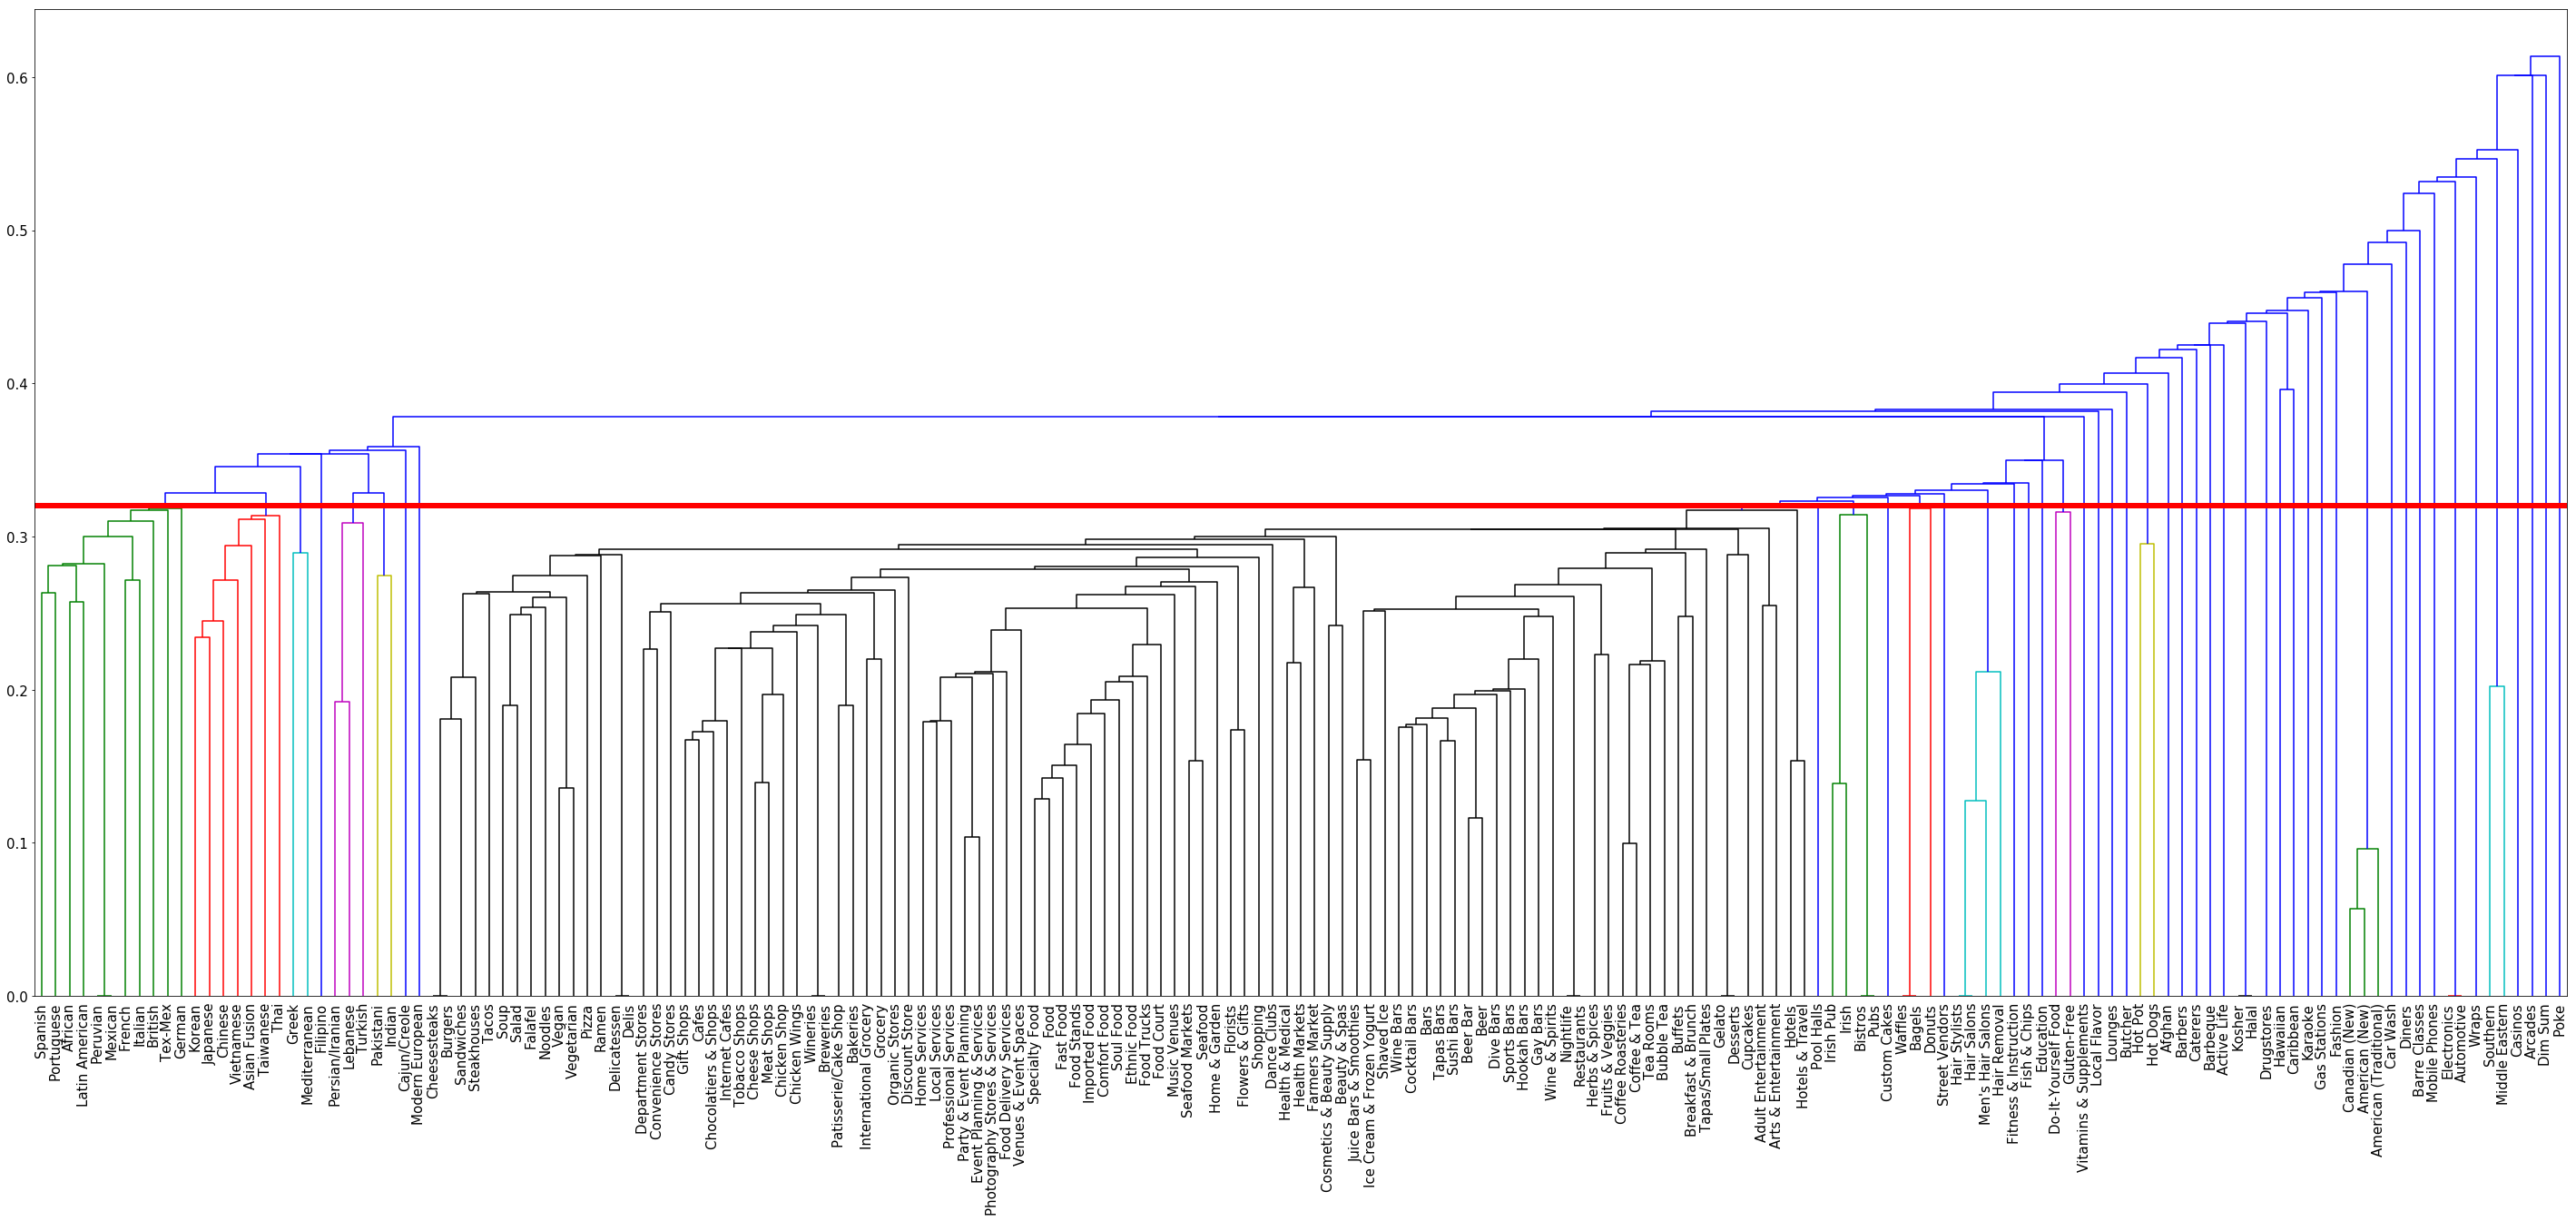

In [106]:
plt.figure(figsize=(50, 20))  

dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=0.32,
            show_leaf_counts=True)
plt.tick_params(labelsize=15)
plt.axhline(y=0.32, linewidth=6, color='r')
plt.show()

In [107]:
from sklearn.cluster import AgglomerativeClustering

In [116]:
cluster = AgglomerativeClustering(n_clusters=48, affinity='cosine', linkage='complete')  
cluster.fit_predict(X)
df['cluster'] = cluster.labels_
df.head(10)

,category,vector,cluster
0,Restaurants,"[0.75425, 0.082286, 0.26682, -1.1926, 1.3475, ...",14
1,Food,"[-0.43512, 0.028351, 0.4911, -0.35168, -0.1157...",20
2,Nightlife,"[0.75425, 0.082286, 0.26682, -1.1926, 1.3475, ...",14
3,Bars,"[1.1394, 0.076544, 0.286, -0.19903, 0.79315, -...",33
4,Coffee & Tea,"[-0.103291, 0.0027956665, -0.01886467, -0.2395...",3
5,Sandwiches,"[0.025339, -0.59327, 0.60124, 0.1331, 0.064419...",5
6,Fast Food,"[-0.444305, 0.12815051, 0.03895001, -0.326115,...",20
7,American (Traditional),"[-0.3096925, 0.04973865, -0.015530257, 0.08481...",43
8,Pizza,"[0.0068727, -0.21634, 0.27831, -0.26192, 0.228...",5
9,Burgers,"[-0.31675, -0.14571, 0.9289, 0.019212, 0.38359...",5


In [119]:
# All business that serves Eastern and South East Asian cusisines are grouped together into a single cluster
df.loc[df['cluster'] == 0]

,category,vector,cluster
15,Chinese,"[-0.47223, 0.055899, -0.31643, -0.4299, 0.3497...",0
23,Japanese,"[-0.48385, -0.22614, -0.20815, -0.18392, 0.172...",0
37,Asian Fusion,"[-0.570545, -0.0930525, 0.3210485, -0.1008035,...",0
46,Thai,"[-0.20915, 0.090433, 0.25395, 0.26853, 0.44573...",0
48,Vietnamese,"[-0.0050585, -0.29045, 0.14349, 0.13825, 0.471...",0
59,Korean,"[-0.11477, -0.18642, 0.079947, 0.094883, 0.521...",0
78,Latin American,"[-0.425435, 0.131381, 0.21040249, -0.038679004...",0
161,African,"[-0.409, 0.23529, 0.14136, -0.38778, 0.19759, ...",0
